In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from yellowbrick.text import FreqDistVisualizer

In [127]:
#importing data from saved dataframe. See: "Project 3 - Data Collection"
data = pd.read_csv("./data/data.csv")

data = data.drop(columns="Unnamed: 0")

data.label.value_counts(1)

1    0.5
0    0.5
Name: label, dtype: float64

In [128]:
#Creating the X and y variables in order to kickstart the preprocessing stage.
X = data["title"]
y = data.label

In [129]:
#Implementing the train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

#For the first gridsearch, we will be testing a CountVectorizer with a Logistic Regression.  
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2750, 3000, 3250],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'lr__penalty': ["l1", "l2"]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7806666666666666


{'cvec__max_features': 2750,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'lr__penalty': 'l2'}

In [130]:
gs.score(X_train, y_train)

0.974

In [131]:
gs.score(X_test, y_test)

0.78

In [132]:
#For our second gridsearch, we will be testing a CountVectorizer with a Multinomial Naive Bayes Classifier. 
#Not shown: gridsearch for optimum alpha. Default provides best results. 

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__max_features': [2750, 2800, 3000],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

0.77


{'cvec__max_features': 2800,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [133]:
gs.score(X_train, y_train)

0.922

In [134]:
gs.score(X_test, y_test)

0.79

In [135]:
#For our third gridsearch, we will be testing a TF-IDF Vectorizer with a Multinomial Naive Bayes Classifier. 

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__max_features': [2750, 2800, 3000],
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

0.7713333333333333


{'tfidf__max_features': 3000,
 'tfidf__ngram_range': (1, 3),
 'tfidf__stop_words': 'english'}

In [136]:
gs.score(X_train, y_train)

0.9286666666666666

In [137]:
gs.score(X_test, y_test)

0.768

In [138]:
#For our last gridsearch, we will be testing a TF-IDF Vectorizer with a Logistic Regression. 

pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

pipe_params = {
    'tfidf__stop_words': [None, 'english'],
    'tfidf__strip_accents': ['ascii', 'unicode', None],
    'tfidf__ngram_range': [(1,3), (1,4), (1,5)],
    'lr__penalty': ["l1", "l2"]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)
gs.fit(X_train, y_train);
print(gs.best_score_)
gs.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7753333333333333


{'lr__penalty': 'l2',
 'tfidf__ngram_range': (1, 3),
 'tfidf__stop_words': 'english',
 'tfidf__strip_accents': None}

In [139]:
gs.score(X_train, y_train)

0.988

In [140]:
gs.score(X_test, y_test)

0.784

*The CountVectorizer/Multinomial Naive Bayes Classifier combinations yields slighly higher accuracy scores. We will proceed with this model.*

In [141]:
#importing r/news and r/nottheonions corpuses for word frequency analysis. 
df = pd.read_pickle("./data/df.pkl")
df2 = pd.read_pickle("./data/df2.pkl")

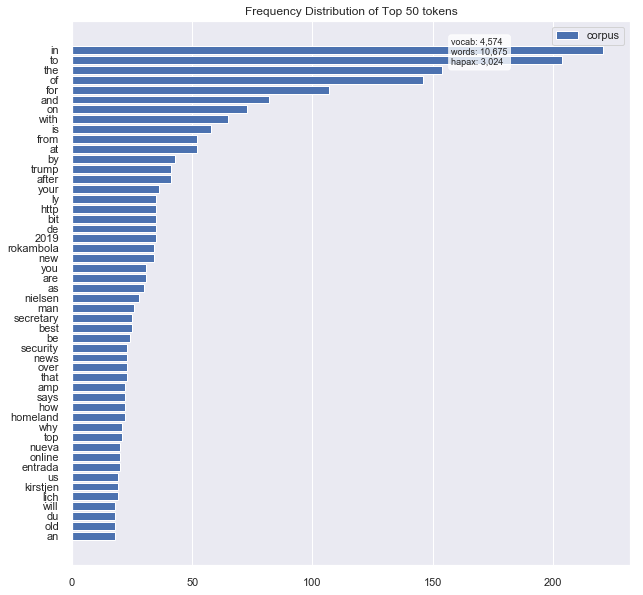

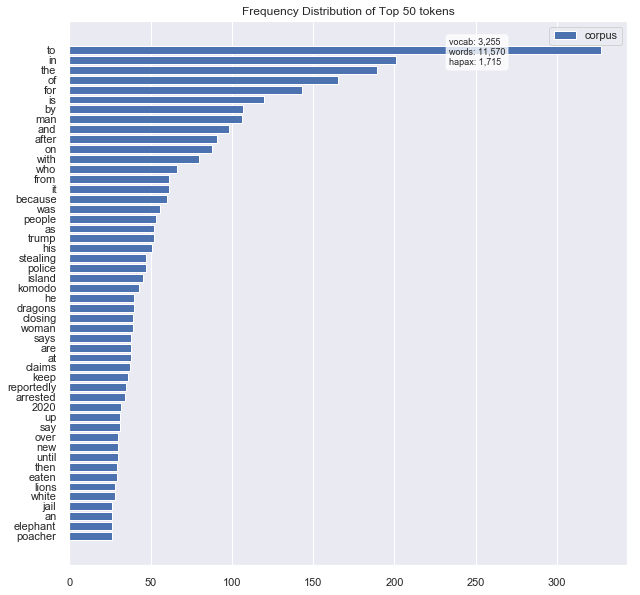

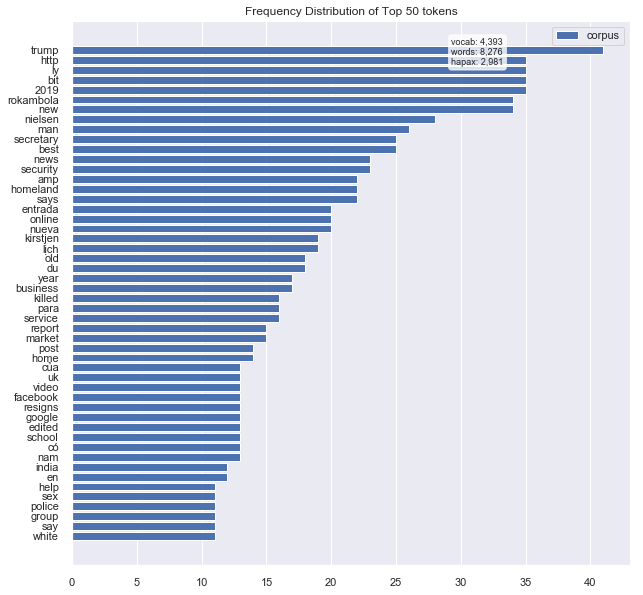

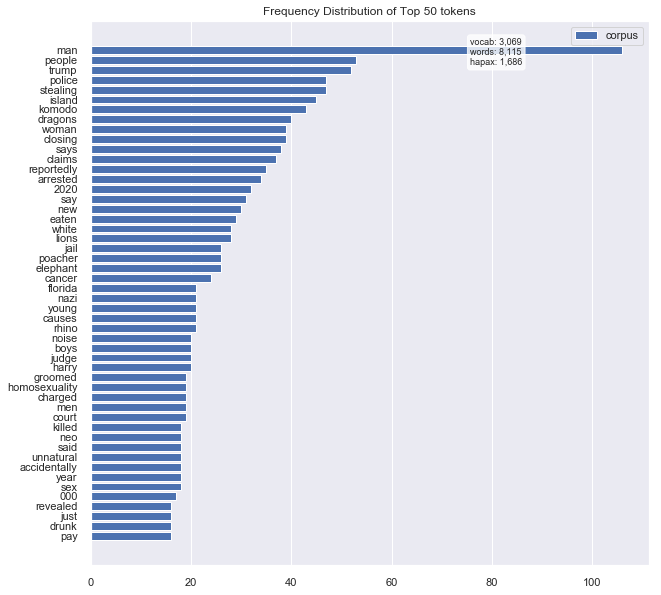

In [142]:
#the first figure will show us the most frequent words in the r/news corpus INCLUDING stop words.

plt.figure(figsize=(10, 10))
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df.title)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#the second will show us the most frequent words in the r/nottheonion corpus INCLUDING stop words.

plt.figure(figsize=(10, 10))
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df2.title)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#the third figure will show us the most frequent words in the r/news corpus EXCLUDING stop words.

plt.figure(figsize=(10, 10))
vectorizer = CountVectorizer(stop_words="english")
docs       = vectorizer.fit_transform(df.title)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

#the fourth figure will show us the most frequent words in the r/nottheonion corpus EXCLUDING stop words.

plt.figure(figsize=(10, 10))
vectorizer = CountVectorizer(stop_words="english")
docs       = vectorizer.fit_transform(df2.title)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

In [143]:
#here we are fitting and tranforming our data to a Multinomial Naive Bayes via a CountVectorizer with the parameters identified during the gridsearch.
cvec = CountVectorizer(max_features=2800, ngram_range=(1,1), stop_words="english")
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train).todense(), columns = cvec.get_feature_names())
X_test_cvec = pd.DataFrame(cvec.transform(X_test).todense(), columns = cvec.get_feature_names())
nb = MultinomialNB()
nb_model = nb.fit(X_train_cvec, y_train)
predictions2 = nb.predict(X_test_cvec)

In [144]:
nb.score(X_train_cvec, y_train)

0.922

In [145]:
nb.score(X_test_cvec, y_test)

0.79

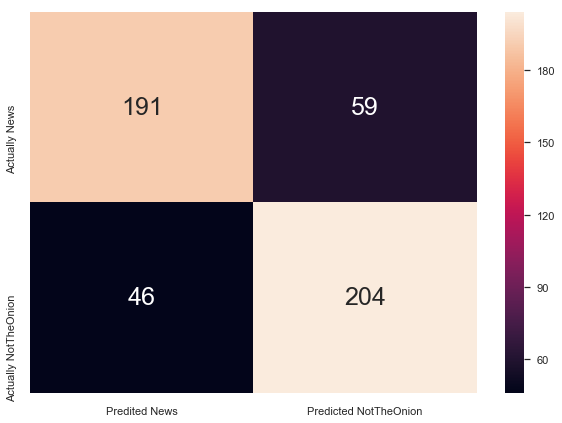

In [146]:
#a confusion matrix will help us identify misclassifications. 

cm = confusion_matrix(y_test, predictions2)

df_cm = pd.DataFrame(cm, index = [i for i in ["Actually News", "Actually NotTheOnion"]],
                  columns = [i for i in ["Predited News", "Predicted NotTheOnion"]])
sns.set(font_scale=1)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="0",annot_kws={"size":25})